# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
# a) Cálculo da média e diferença através de uma multiplicação matricial

# Criando a matriz de transformação
T = np.array([[0.5, 0.5], [0.5, -0.5]])

# Aplicando a transformação aos dados
transformed_data = df.values @ T

# Obtendo a média e a diferença dos dados transformados
mean_transformed = transformed_data.mean(axis=0)
diff_transformed = transformed_data[:, 0] - transformed_data[:, 1]

# Imprimindo os resultados
print("Média transformada:", mean_transformed)
print("Diferença transformada:", diff_transformed)

Média transformada: [ 5.06235145 -0.04377278]
Diferença transformada: [ 7.94342786  5.09953669  0.97442921  4.47435948  8.93840192  3.43300187
  9.83732521  7.91761336  5.70002541  5.67606136  4.9274243   8.35988974
  3.61301373  1.39164163  4.29471455  6.0536886   3.24221635  2.5617541
  5.36100382  5.08518381  5.14570844  8.69384201  7.71299237  5.27908012
  8.38663787  2.13238609  1.49478621  3.3223594   2.53377443  6.18373165
  0.08353268  2.73104897  5.56386501  4.24798199  5.91925539  3.92992042
  3.94875492  7.84798923  8.7091382   3.80584363  8.32664288  1.32062518
  4.32306036  2.88091007  8.84412671  3.68241559  4.49533188 10.
  4.11028328  4.76547371]


In [3]:
# b) Cálculo da correlação entre os dados da p1 e p2

# Calculando a correlação entre p1 e p2
correlation_p1_p2 = df['p1'].corr(df['p2'])

# Imprimindo o resultado
print("Correlação entre p1 e p2:", correlation_p1_p2)

Correlação entre p1 e p2: 0.8957365818728046


In [4]:
# c) Cálculo da correlação entre os dados transformados (média e diferença)

# Calculando a correlação entre os dados transformados
correlation_transformed = np.corrcoef(transformed_data[:, 0], transformed_data[:, 1])[0, 1]

# Imprimindo o resultado
print("Correlação entre os dados transformados:", correlation_transformed)

Correlação entre os dados transformados: -0.13347385411788837


### Comentários sobre as correlações observadas:

A correlação entre p1 e p2 indica o grau de associação linear entre essas duas variáveis. Seu valor varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica ausência de correlação.

Já a correlação entre os dados transformados (média e diferença) mostra a associação linear entre a média e a diferença das notas. Essa correlação pode ser interpretada como uma medida da relação entre a magnitude das notas e a diferença entre elas.

Você pode imprimir os resultados adicionando os comandos **`print`** mencionados acima ao final do código fornecido.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

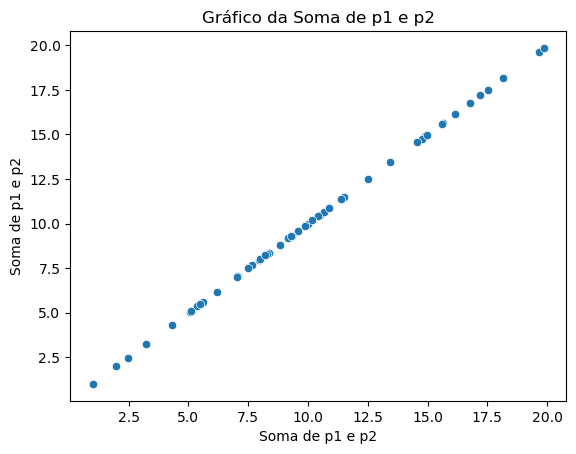

In [5]:
# Criando a matriz de transformação
T_soma = np.array([[1, 1]])

# Aplicando a transformação aos dados
transformed_data_soma = df.values @ T_soma.T

# Plotando o gráfico
sns.scatterplot(x=transformed_data_soma[:, 0], y=transformed_data_soma[:, 0])
plt.xlabel('Soma de p1 e p2')
plt.ylabel('Soma de p1 e p2')
plt.title('Gráfico da Soma de p1 e p2')
plt.show()

In [6]:
# Obtendo as coordenadas x e y dos pontos do gráfico
x_values = transformed_data_soma[:, 0]
y_values = transformed_data_soma[:, 0]

# Criando um DataFrame com as coordenadas
data_table = pd.DataFrame({'x': x_values, 'y': y_values})

# Imprimindo a tabela
print(data_table)

            x          y
0   14.908120  14.908120
1    7.960930   7.960930
2    3.242944   3.242944
3    9.987507   9.987507
4   16.133092  16.133092
5    7.664066   7.664066
6   19.644967  19.644967
7   14.765911  14.765911
8   10.509344  10.509344
9    9.597237   9.597237
10   8.359204   8.359204
11  15.650387  15.650387
12   7.998736   7.998736
13   1.988421   1.988421
14   8.275157   8.275157
15  13.433643  13.433643
16   5.067134   5.067134
17   4.316272   4.316272
18  10.676518  10.676518
19  10.403460  10.403460
20  11.489718  11.489718
21  17.188160  17.188160
22  14.957546  14.957546
23  11.389315  11.389315
24  15.611072  15.611072
25   5.361975   5.361975
26   5.112673   5.112673
27   5.604992   5.604992
28   5.470915   5.470915
29  12.493493  12.493493
30   1.004582   1.004582
31   7.068061   7.068061
32   9.872493   9.872493
33   9.184833   9.184833
34  10.177558  10.177558
35   7.052533   7.052533
36   8.212268   8.212268
37  16.781881  16.781881
38  18.150738  18.150738


In [7]:
# Obtendo estatísticas descritivas dos dados
stats = data_table.describe()

# Imprimindo as estatísticas descritivas
print(stats)

               x          y
count  50.000000  50.000000
mean   10.124703  10.124703
std     4.713745   4.713745
min     1.004582   1.004582
25%     7.056415   7.056415
50%     9.461456   9.461456
75%    14.283040  14.283040
max    19.855598  19.855598


### Conclusões
A transformação que utiliza a soma de p1 e p2 resulta em uma distribuição de valores diferentes da transformação que utiliza a média. Os dados transformados pela soma têm uma escala maior e uma variação mais ampla em relação aos dados originais. Essas diferenças podem ter um impacto significativo na interpretação e análise dos dados.